In [13]:
import numpy as np 
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_spot = pd.read_csv("LearnPython/spotify_data.csv")
df_spot.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [3]:
pd.isnull(df_spot).sum()


Unnamed: 0          0
artist_name         0
track_name          0
track_id            0
popularity          0
year                0
genre               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

In [4]:
df_spot.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159764 entries, 0 to 1159763
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1159764 non-null  int64  
 1   artist_name       1159764 non-null  object 
 2   track_name        1159764 non-null  object 
 3   track_id          1159764 non-null  object 
 4   popularity        1159764 non-null  int64  
 5   year              1159764 non-null  int64  
 6   genre             1159764 non-null  object 
 7   danceability      1159764 non-null  float64
 8   energy            1159764 non-null  float64
 9   key               1159764 non-null  int64  
 10  loudness          1159764 non-null  float64
 11  mode              1159764 non-null  int64  
 12  speechiness       1159764 non-null  float64
 13  acousticness      1159764 non-null  float64
 14  instrumentalness  1159764 non-null  float64
 15  liveness          1159764 non-null  float64
 16  

In [5]:
df = df_spot.dropna()

df2 = df.loc[df["popularity"] >= 85 ]


df2.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
12104,12104,Bruno Mars,Locked out of Heaven,3w3y8KPTfNeOKPiqUTakBh,85,2012,dance,0.726,0.698,5,-4.165,1,0.0431,0.0490,0.000000,0.3090,0.867,143.994,233478,4
40342,40342,Bruno Mars,When I Was Your Man,0nJW01T7XtvILxQgC5J7Wh,87,2012,pop,0.612,0.280,0,-8.648,1,0.0434,0.9320,0.000000,0.0880,0.387,72.795,213827,4
77591,77591,Arctic Monkeys,I Wanna Be Yours,5XeFesFbtLpXzIVDNQP22n,91,2013,garage,0.464,0.417,0,-9.345,0,0.0256,0.1360,0.022000,0.0974,0.479,67.528,183956,4
77592,77592,Arctic Monkeys,Why'd You Only Call Me When You're High?,086myS9r57YsLbJpU0TgK9,85,2013,garage,0.691,0.631,2,-6.478,1,0.0368,0.0483,0.000011,0.1040,0.800,92.004,161124,4
77593,77593,Arctic Monkeys,Do I Wanna Know?,5FVd6KXrgO9B3JPmC8OPst,86,2013,garage,0.548,0.532,5,-7.596,1,0.0323,0.1860,0.000263,0.2170,0.405,85.030,272394,4


/var/folders/57/lf86kj3j1nbgntrjl2hdm3j80000gn/T/ipykernel_51184/1866245608.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df2.corr()


<Axes: >

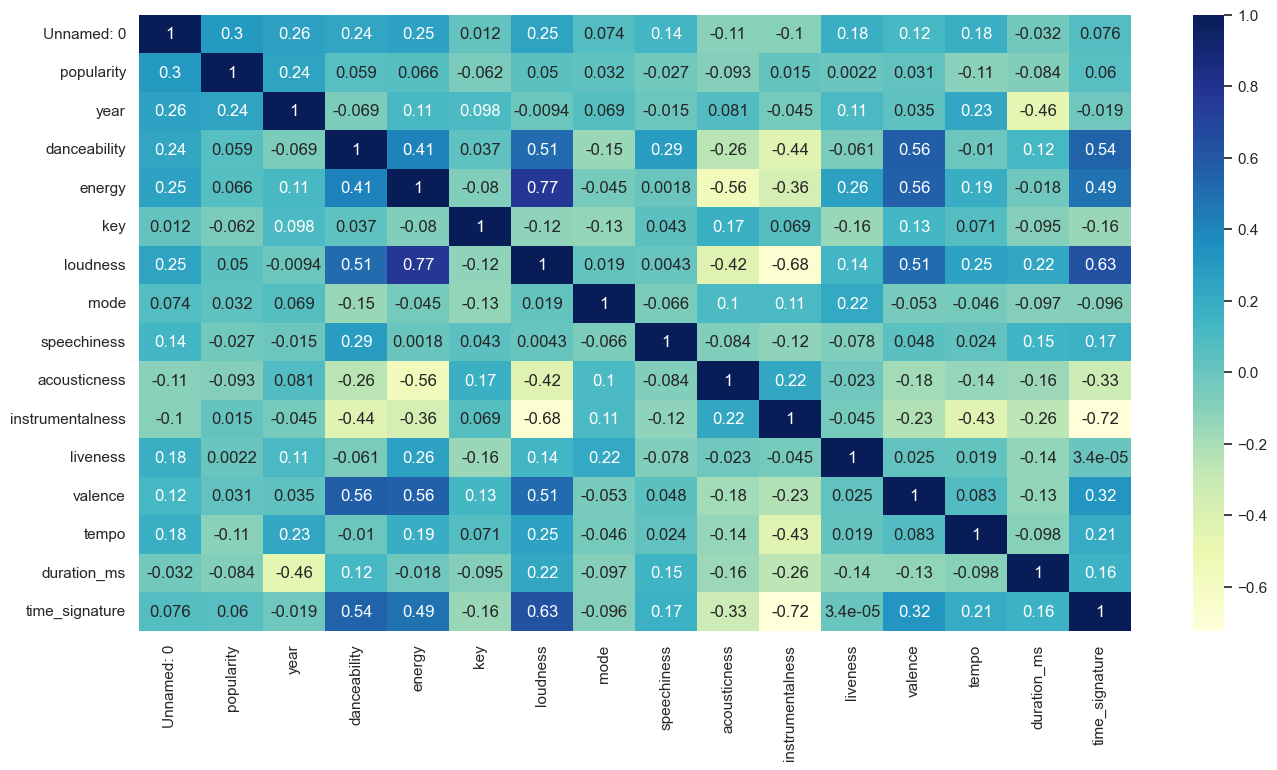

In [6]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
corr = df2.corr()
sns.heatmap(corr,annot=True, cmap="YlGnBu")

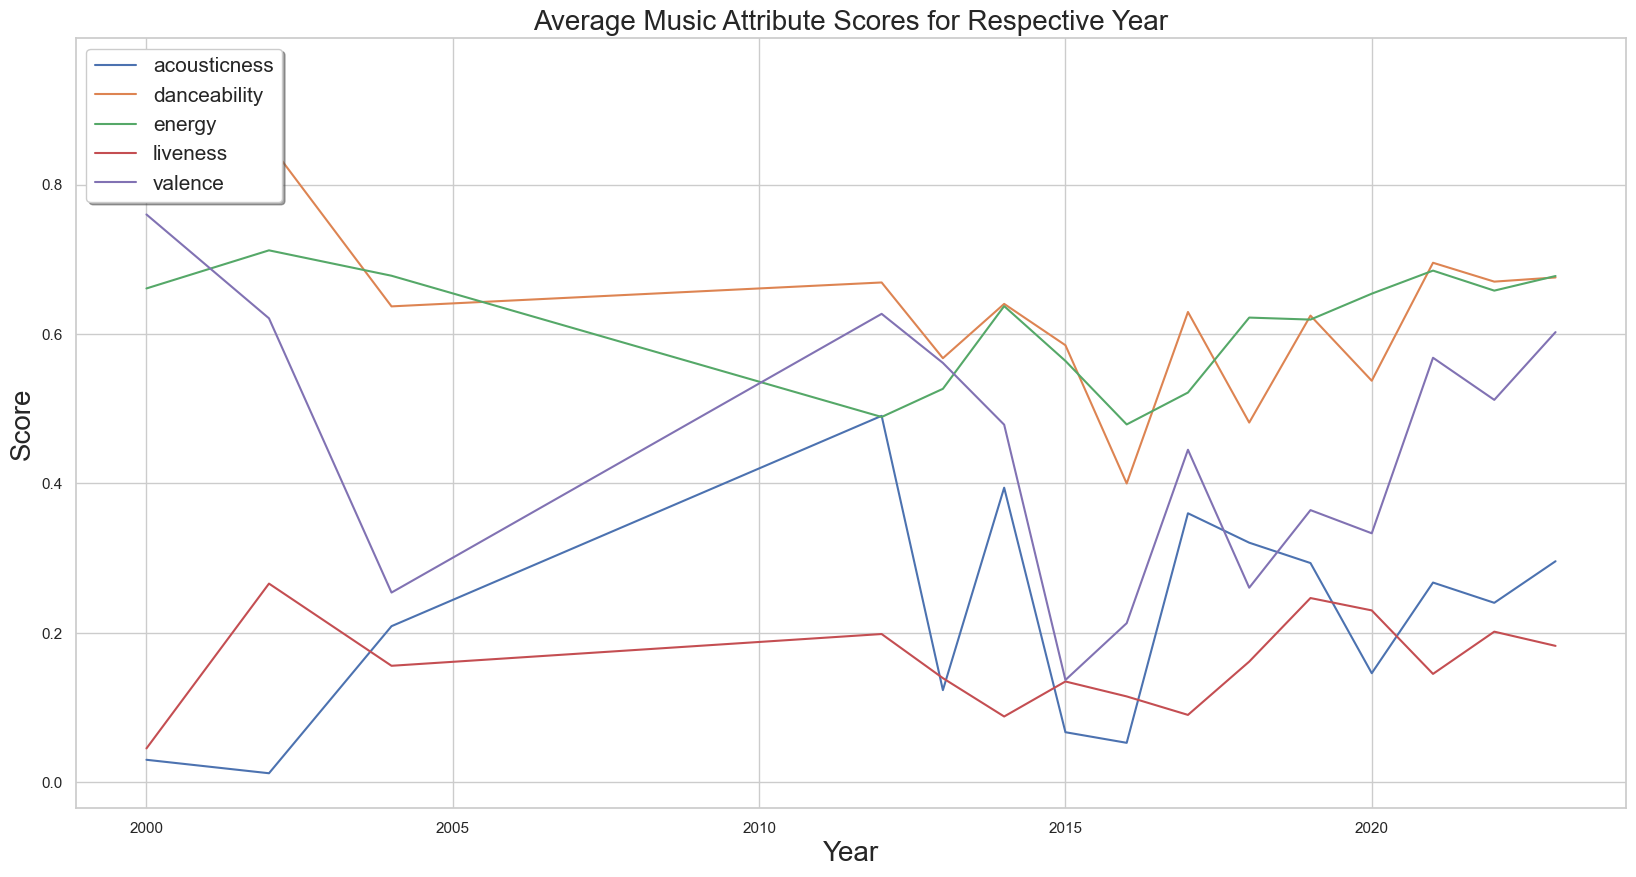

In [10]:
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
# the columns that we are interseted in
target_cols = ["acousticness","danceability","energy","liveness","valence"]
for c in target_cols:
    # group the data by year, and plot the mean score of all music in that year
    x = df2.groupby("year")[c].mean()
    ax= sns.lineplot(x=x.index,y=x,label=c)

ax.set_title('Average Music Attribute Scores for Respective Year', fontsize = 20)
ax.legend(fancybox=True, framealpha=1, shadow=True, prop={'size': 15}, loc = 'upper left')
ax.set_ylabel('Score', fontsize = 20)
ax.set_xlabel('Year', fontsize = 20)

plt.savefig('AMA.png')

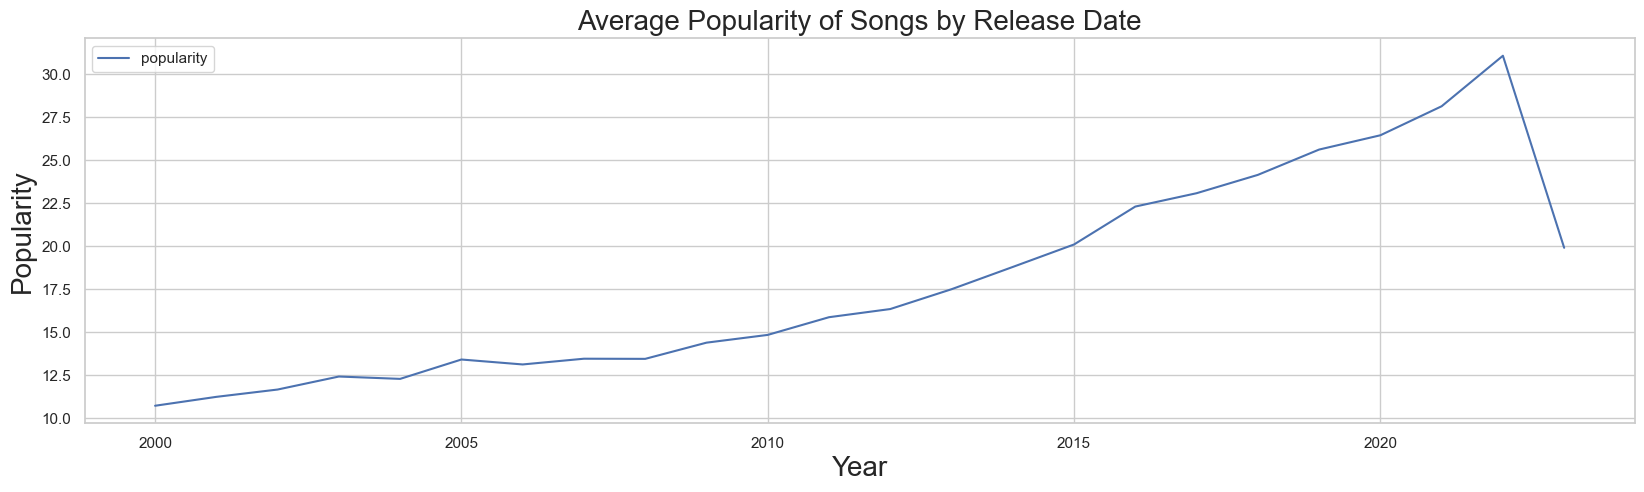

In [11]:
plt.figure(figsize=(20, 5))
# mean  over year
x = df.groupby('year')["popularity"].mean()
ax = sns.lineplot(x= x.index, y=x, label="popularity")

# set axis label and titles 
ax.set_title('Average Popularity of Songs by Release Date', fontsize = 20)
ax.set_ylabel('Popularity', fontsize = 20)
ax.set_xlabel('Year', fontsize = 20)

plt.savefig('APS_RD.png')
#entire set

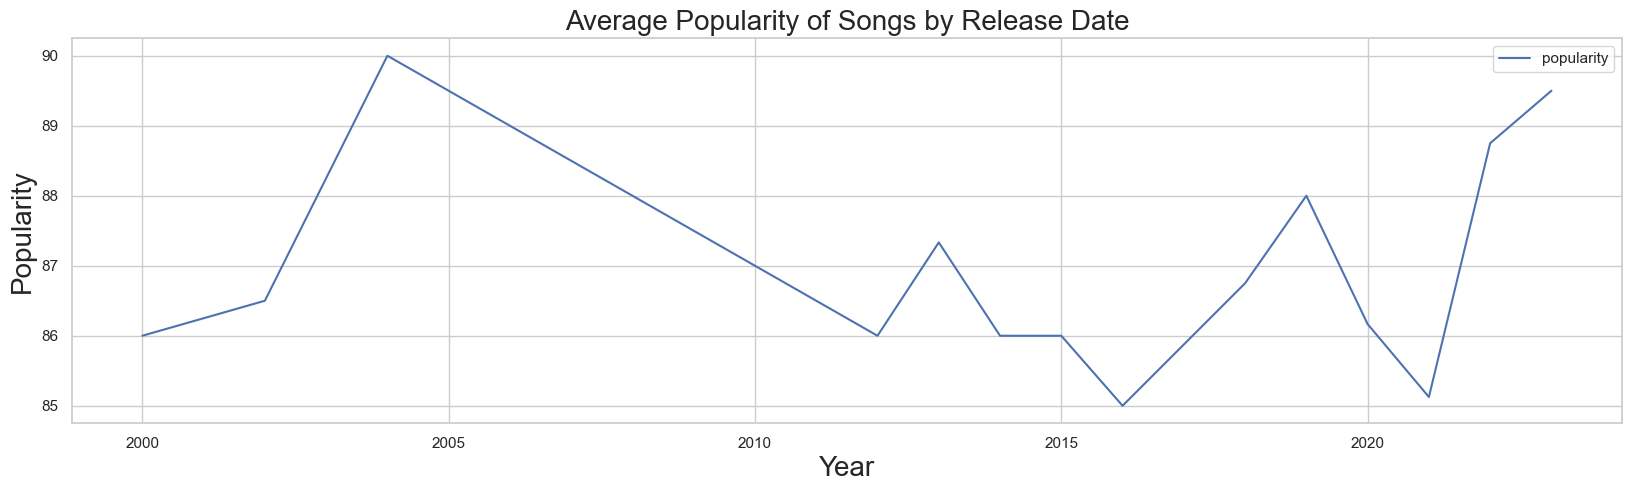

In [12]:
plt.figure(figsize=(20, 5))
# mean  over year
x = df2.groupby('year')["popularity"].mean()
ax = sns.lineplot(x= x.index, y=x, label="popularity")

# set axis label and titles 
ax.set_title('Average Popularity of Songs by Release Date', fontsize = 20)
ax.set_ylabel('Popularity', fontsize = 20)
ax.set_xlabel('Year', fontsize = 20)
plt.savefig('APS_85.png')
#>85